[...]

## Imports

In [1]:
#| echo: false

import sys
from pathlib import Path

src_path = Path('..')
sys.path.append(str(src_path.resolve()))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from great_tables import GT
from itertools import combinations
from pandas.plotting import scatter_matrix
from IPython.display import (
    display as display3,
    Markdown
)

from src.paths import get_path_to
from src.stylesheet import customize_plots
from src.inspection import make_df, display, display2

In [3]:
#| include: false
customize_plots()
# plt.style.use("_matplotlibrc")
%config InlineBackend.figure_format = 'svg'

## The dataset

### Load the data

We begin by exploring the data to get to know the features and patterns on which we will base our analysis.

In [4]:
#| output: false
#| warning: false
#| code-fold: true
#| code-summary: Load the data

if 'data' not in locals():
    data = pd.read_csv(
        get_path_to("data", "raw", "PBJ_Daily_Nurse_Staffing_Q1_2024.zip"),
        encoding='ISO-8859-1',
        low_memory=False
    )
else:
    print("data loaded.")

### Inspect the data

In [5]:
GT(data.sample(10))

GT(_tbl_data=        PROVNUM                       PROVNAME          CITY STATE  \
977680   395405              QUAKERTOWN CENTER    QUAKERTOWN    PA   
261025   145021  MACOMB POST ACUTE CARE CENTER        MACOMB    IL   
12870    015303     WEST HILL HEALTH AND REHAB    BIRMINGHAM    AL   
916415   366419               LEGACY TWINSBURG     TWINSBURG    OH   
1199887  53A002          AMIE HOLT CARE CENTER       BUFFALO    WY   
1203077  555071          SUNNYVIEW CARE CENTER   LOS ANGELES    CA   
8995     015177   WOODHAVEN MANOR NURSING HOME     DEMOPOLIS    AL   
167656   105385       ROYAL OAK NURSING CENTER     DADE CITY    FL   
327633   155167      WESTMINSTER VILLAGE NORTH  INDIANAPOLIS    IN   
286570   145704       APOSTOLIC CHRISTIAN HOME       ROANOKE    IL   

         COUNTY_NAME  COUNTY_FIPS  CY_Qtr  WorkDate  MDScensus  Hrs_RNDON  \
977680         Bucks           17  2024Q1  20240308        120        8.0   
261025    Mc Donough          109  2024Q1  20240207         54        8.0   
12870      Jefferson           73  2024Q1  20240209         84        8.0   
916415        Summit          153  2024Q1  20240215         78       16.0   
1199887      Johnson           19  2024Q1  20240222         28        8.0   
1203077  Los Angeles           37  2024Q1  20240227         90        8.0   
8995         Marengo           91  2024Q1  20240318         71        8.0   
167656         Pasco          101  2024Q1  20240204        112        0.0   
327633        Marion           97  2024Q1  20240203        118        0.0   
286570      Woodford          203  2024Q1  20240112         47        8.0   

         ...  Hrs_LPN_ctr  Hrs_CNA  Hrs_CNA_emp  Hrs_CNA_ctr  Hrs_NAtrn  \
977680   ...        24.08   207.12       191.95        15.17      15.52   
261025   ...         8.42   122.25       122.25         0.00       0.00   
12870    ...         0.00   139.94       139.94         0.00       0.00   
916415   ...         8.00   173.75       131.50        42.25       0.00   
1199887  ...         0.00    70.90        70.90         0.00      44.30   
1203077  ...         0.00   216.70       216.70         0.00       0.00   
8995     ...         6.00   150.25       150.25         0.00       0.00   
167656   ...        15.50   231.75       231.75         0.00       0.00   
327633   ...         0.00   314.60       314.60         0.00       0.00   
286570   ...         0.00   107.04       102.54         4.50       3.98   

         Hrs_NAtrn_emp  Hrs_NAtrn_ctr  Hrs_MedAide  Hrs_MedAide_emp  \
977680           15.52            0.0         0.00             0.00   
261025            0.00            0.0         0.00             0.00   
12870             0.00            0.0        25.86            25.86   
916415            0.00            0.0        25.50            25.50   
1199887          44.30            0.0         9.70             9.70   
1203077           0.00            0.0         0.00             0.00   
8995              0.00            0.0         0.00             0.00   
167656            0.00            0.0         0.00             0.00   
327633            0.00            0.0        37.80            37.80   
286570            3.98            0.0         0.00             0.00   

         Hrs_MedAide_ctr  
977680               0.0  
261025               0.0  
12870                0.0  
916415               0.0  
1199887              0.0  
1203077              0.0  
8995                 0.0  
167656               0.0  
327633               0.0  
286570               0.0  

[10 rows x 33 columns], _body=<great_tables._gt_data.Body object at 0x12fe6cf50>, _boxhead=Boxhead([ColInfo(var='PROVNUM', type=<ColInfoTypeEnum.default: 1>, column_label='PROVNUM', column_align='left', column_width=None), ColInfo(var='PROVNAME', type=<ColInfoTypeEnum.default: 1>, column_label='PROVNAME', column_align='left', column_width=None), ColInfo(var='CITY', type=<ColInfoTypeEnum.default: 1>, column_label='CITY', column_align='left', column_width=None

In [6]:
#| include: false
#| code-fold: true
data.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330966 entries, 0 to 1330965
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PROVNUM           1330966 non-null  object 
 1   PROVNAME          1330966 non-null  object 
 2   CITY              1330966 non-null  object 
 3   STATE             1330966 non-null  object 
 4   COUNTY_NAME       1330966 non-null  object 
 5   COUNTY_FIPS       1330966 non-null  int64  
 6   CY_Qtr            1330966 non-null  object 
 7   WorkDate          1330966 non-null  int64  
 8   MDScensus         1330966 non-null  int64  
 9   Hrs_RNDON         1330966 non-null  float64
 10  Hrs_RNDON_emp     1330966 non-null  float64
 11  Hrs_RNDON_ctr     1330966 non-null  float64
 12  Hrs_RNadmin       1330966 non-null  float64
 13  Hrs_RNadmin_emp   1330966 non-null  float64
 14  Hrs_RNadmin_ctr   1330966 non-null  float64
 15  Hrs_RN            1330966 non-null  float64
 16  

In [7]:
#| include: true

df = data.describe().round(1)
GT(df.reset_index())

GT(_tbl_data=   index  COUNTY_FIPS    WorkDate  MDScensus  Hrs_RNDON  Hrs_RNDON_emp  \
0  count    1330966.0   1330966.0  1330966.0  1330966.0      1330966.0   
1   mean         91.1  20240215.7       83.4        5.2            5.1   
2    std         99.2        83.0       49.1        4.5            4.5   
3    min          1.0  20240101.0        0.0        0.0            0.0   
4    25%         31.0  20240123.0       51.0        0.0            0.0   
5    50%         69.0  20240215.0       76.0        8.0            8.0   
6    75%        117.0  20240309.0      104.0        8.0            8.0   
7    max        840.0  20240331.0      743.0      327.8          327.8   

   Hrs_RNDON_ctr  Hrs_RNadmin  Hrs_RNadmin_emp  Hrs_RNadmin_ctr  ...  \
0      1330966.0    1330966.0        1330966.0        1330966.0  ...   
1            0.1         10.3             10.0              0.2  ...   
2            0.9         14.9             14.6              1.8  ...   
3            0.0          0.0              0.0              0.0  ...   
4            0.0          0.0              0.0              0.0  ...   
5            0.0          7.5              7.4              0.0  ...   
6            0.0         16.0             16.0              0.0  ...   
7           42.0        266.2            266.2             92.5  ...   

   Hrs_LPN_ctr    Hrs_CNA  Hrs_CNA_emp  Hrs_CNA_ctr  Hrs_NAtrn  Hrs_NAtrn_emp  \
0    1330966.0  1330966.0    1330966.0    1330966.0  1330966.0      1330966.0   
1          6.5      171.2        158.2         13.0        4.2            4.2   
2         16.2      113.7        106.3         32.6       13.1           12.7   
3          0.0        0.0          0.0          0.0        0.0            0.0   
4          0.0       97.0         88.0          0.0        0.0            0.0   
5          0.0      148.1        136.8          0.0        0.0            0.0   
6          5.8      217.0        203.1         11.0        0.0            0.0   
7        454.0     1857.7       1573.1        694.3      452.0          279.0   

   Hrs_NAtrn_ctr  Hrs_MedAide  Hrs_MedAide_emp  Hrs_MedAide_ctr  
0      1330966.0    1330966.0        1330966.0        1330966.0  
1            0.1          8.5              8.3              0.2  
2            2.1         17.6             17.2              2.2  
3            0.0          0.0              0.0              0.0  
4            0.0          0.0              0.0              0.0  
5            0.0          0.0              0.0              0.0  
6            0.0         11.2             10.8              0.0  
7          280.5        395.6            395.6            128.9  

[8 rows x 28 columns], _body=<great_tables._gt_data.Body object at 0x1690a8490>, _boxhead=Boxhead([ColInfo(var='index', type=<ColInfoTypeEnum.default: 1>, column_label='index', column_align='left', column_width=None), ColInfo(var='COUNTY_FIPS', type=<ColInfoTypeEnum.default: 1>, column_label='COUNTY_FIPS', column_align='right', column_width=None), ColInfo(var='WorkDate', type=<ColInfoTypeEnum.default: 1>, column_label='WorkDate', column_align='right', column_width=None), ColInfo(var='MDScensus', type=<ColInfoTypeEnum.default: 1>, column_label='MDScensus', column_align='right', column_width=None), ColInfo(var='Hrs_RNDON', type=<ColInfoTypeEnum.default: 1>, column_label='Hrs_RNDON', column_align='right', column_width=None), ColInfo(var='Hrs_RNDON_emp', type=<ColInfoTypeEnum.default: 1>, column_label='Hrs_RNDON_emp', column_align='right', column_width=None), ColInfo(var='Hrs_RNDON_ctr', type=<ColInfoTypeEnum.default: 1>, column_label='Hrs_RNDON_ctr', column_align='right', column_width=None), ColInfo(var='Hrs_RNadmin', type=<ColInfoTypeEnum.default: 1>, column_label='Hrs_RNadmin', column_align='right', column_width=None), ColInfo(var='Hrs_RNadmin_emp', type=<ColInfoTypeEnum.default: 1>, column_label='Hrs_RNadmin_emp', column_align='right', column_width=None), ColInfo(var='Hrs_RNadmin_ctr', type=<ColInfoTypeEnum.default: 1>, colu

### Group the features

We note that there are 91 records per provider (`len(data["WorkDate"].unique())`) and 1,330,966 records in the table overall. The following table, which collapses the raw data across providers, thus has 14,626 $\left( \frac{1330966}{91} \right)$ entries.

In [8]:
#| include: true
#| label: tbl-counts
#| tbl-cap: Record counts across state, country, city, and provider.

df = (
    data.loc[:, [
        "STATE",
        "COUNTY_NAME", "COUNTY_FIPS",
        "CITY",
        "PROVNAME", "PROVNUM",
    ]]
    .value_counts()
    .to_frame()
    .rename(columns={0: 'Counts'})
)
GT(df.reset_index().head(n=20))

GT(_tbl_data=   STATE COUNTY_NAME  COUNTY_FIPS          CITY  \
0     AK   Anchorage           20     ANCHORAGE   
1     OH       Allen            3          LIMA   
2     OH       Allen            3          LIMA   
3     OH       Allen            3          LIMA   
4     OH       Allen            3          LIMA   
5     OH       Allen            3  SPENCERVILLE   
6     OH     Ashland            5       ASHLAND   
7     OH     Ashland            5       ASHLAND   
8     OH     Ashland            5       ASHLAND   
9     OH     Ashland            5       ASHLAND   
10    OH   Ashtabula            7       ANDOVER   
11    OH   Ashtabula            7     ASHTABULA   
12    OH   Ashtabula            7     ASHTABULA   
13    OH   Ashtabula            7     ASHTABULA   
14    OH   Ashtabula            7    AUSTINBURG   
15    OH   Ashtabula            7      CONNEAUT   
16    OH   Ashtabula            7        GENEVA   
17    OH   Ashtabula            7        GENEVA   
18    OH   Ashtabula            7        GENEVA   
19    OH   Ashtabula            7     JEFFERSON   

                                         PROVNAME PROVNUM  Counts  
0       PRESTIGE CARE & REHAB CENTER OF ANCHORAGE  025025      91  
1                          LIMA CONVALESCENT HOME  366297      91  
2                                   SHAWNEE MANOR  365361      91  
3                             SPRINGS OF LIMA THE  366464      91  
4                                SPRINGVIEW MANOR  366221      91  
5                                  ROSELAWN MANOR  365744      91  
6        BRETHREN CARE VILLAGE HEALTH CARE CENTER  366166      91  
7                  CRYSTAL CARE CENTER OF ASHLAND  366239      91  
8                               GOOD SHEPHERD THE  365093      91  
9                             KINGSTON OF ASHLAND  365646      91  
10           ANDOVER VILLAGE RETIREMENT COMMUNITY  365411      91  
11                                 CARINGTON PARK  365286      91  
12                  COUNTRY CLUB RET CENTER I I I  365642      91  
13                               SAYBROOK LANDING  366382      91  
14                  AUSTINBURG NSG AND  REHAB CTR  366088      91  
15  LAKE POINTE REHABILITATION AND NURSING CENTER  365441      91  
16   GENEVA CENTER FOR REHABILITATION AND NURSING  366326      91  
17                   PINE GROVE HEALTHCARE CENTER  366366      91  
18                                 RAE ANN GENEVA  366047      91  
19                    JEFFERSON HEALTHCARE CENTER  365638      91  , _body=<great_tables._gt_data.Body object at 0x12f3ea950>, _boxhead=Boxhead([ColInfo(var='STATE', type=<ColInfoTypeEnum.default: 1>, column_label='STATE', column_align='left', column_width=None), ColInfo(var='COUNTY_NAME', type=<ColInfoTypeEnum.default: 1>, column_label='COUNTY_NAME', column_align='left', column_width=None), ColInfo(var='COUNTY_FIPS', type=<ColInfoTypeEnum.default: 1>, column_label='COUNTY_FIPS', column_align='right', column_width=None), ColInfo(var='CITY', type=<ColInfoTypeEnum.default: 1>, column_label='CITY', column_align='left', column_width=None), ColInfo(var='PROVNAME', type=<ColInfoTypeEnum.default: 1>, column_label='PROVNAME', column_align='left', column_width=None), ColInfo(var='PROVNUM', type=<ColInfoTypeEnum.default: 1>, column_label='PROVNUM', column_align='right', column_width=None), ColInfo(var='Counts', type=<ColInfoTypeEnum.default: 1>, column_label='Counts', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x111dba710>, _spanners=Spanners([]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x178ec7d50>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px'

In [9]:
#| include: false

display2(
    "data['STATE'].value_counts()",
    "data['COUNTY_NAME'].value_counts()",
    "data['CITY'].value_counts()",
    "data['PROVNAME'].value_counts()",
    "data['MDScensus'].value_counts()",
    width="340px",
    globs=globals()
)

In [10]:
#| tbl-column: margin
    
GT(data[["CY_Qtr", "WorkDate", "MDScensus"]].head())

GT(_tbl_data=   CY_Qtr  WorkDate  MDScensus
0  2024Q1  20240101         50
1  2024Q1  20240102         49
2  2024Q1  20240103         49
3  2024Q1  20240104         50
4  2024Q1  20240105         51, _body=<great_tables._gt_data.Body object at 0x111b88d90>, _boxhead=Boxhead([ColInfo(var='CY_Qtr', type=<ColInfoTypeEnum.default: 1>, column_label='CY_Qtr', column_align='left', column_width=None), ColInfo(var='WorkDate', type=<ColInfoTypeEnum.default: 1>, column_label='WorkDate', column_align='right', column_width=None), ColInfo(var='MDScensus', type=<ColInfoTypeEnum.default: 1>, column_label='MDScensus', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x178ee34d0>, _spanners=Spanners([]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x178ef0c10>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='heading', type='value', value='center'), heading_title_font_size=OptionsInfo(scss=True, category='heading', type='px', value='125%'), heading_title_font_weight=OptionsInfo(scss=True, categor

In [11]:
# Normalize feature names
# data.rename(columns=lambda name: name.replace('_', ' ').capitalize())

# Group by location for geographic view
# data.groupby(by=["STATE", "CITY"])["Hrs_NAtrn"].sum()

# Pivot by date for historical view

# Query
# (data
#  .query("Hrs_NAtrn > 0 and STATE in ['AL', 'AZ'] and WorkDate > 20240315")
# )

# Subset feature groups
data.filter(regex=r'^Hrs_[^_]+$', axis='columns')
# data.filter(like="Hrs_RNDON", axis="columns")

# Drop
# data.drop(columns=data.filter(regex="^CY_Qtr$").columns, inplace=False)

Hrs_RNDON  Hrs_RNadmin  Hrs_RN  Hrs_LPNadmin  Hrs_LPN  Hrs_CNA  \
0              8.0         8.00   40.07          0.00    18.16   156.34   
1              8.0        18.24   58.89          0.00    22.96   149.40   
2              8.0        15.10   55.02          0.00    20.70   147.15   
3              8.0        14.90   57.13          0.00    12.70   142.21   
4              8.0        15.47   46.76          0.00    27.44   149.40   
...            ...          ...     ...           ...      ...      ...   
1330961        8.0         4.33   13.33          8.00   100.22   139.88   
1330962        8.0         0.00    8.68          7.00   117.53   158.07   
1330963        8.0         0.00   12.70          4.25    76.10   146.04   
1330964        0.0         5.48   29.19          0.00    73.43   115.43   
1330965        0.0         0.00   16.54          0.00    69.37    96.48   

         Hrs_NAtrn  Hrs_MedAide  
0             0.00         0.00  
1             0.00         0.00  
2             0.00         0.00  
3             0.00         0.00  
4             0.00         0.00  
...            ...          ...  
1330961      15.34        22.70  
1330962      16.26        17.47  
1330963       5.57        17.94  
1330964       0.00        14.35  
1330965       9.63        14.62  

[1330966 rows x 8 columns]

### Clean the data

In [12]:
# Normalize feature names (lowercase and remove underscores)

# Normalize categorical features (make a column title case)
# data['CITY'].str.title()

## Explore the dataset

### Visualize distributions

### Visualize relationships

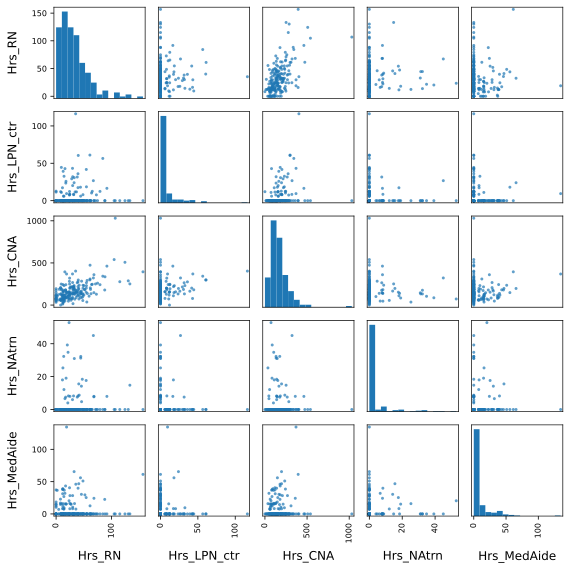

In [13]:
#| include: true
#| label: fig-scatter-matrix
#| fig-cap: Scatter matrix of nursing worker working hours
#| column: body-outset-right

attributes = ["Hrs_RN", "Hrs_LPN_ctr", "Hrs_CNA", "Hrs_NAtrn", "Hrs_MedAide"]
n = len(attributes)

fig, axs = plt.subplots(n, n, figsize=(8, 8))
scatter_matrix(
    data[attributes].sample(200),
    ax=axs, alpha=.7,
    hist_kwds=dict(bins=15, linewidth=0)
)
fig.align_ylabels(axs[:, 0])
fig.align_xlabels(axs[-1, :])
for ax in axs.flatten():
    ax.tick_params(axis='both', which='both', length=3.5)

# save_fig("scatter_matrix_plot")

plt.show()

### Compare groups

::: {#nte-rec1 .callout-note appearance="regular"}

## [Recommendation].


:::

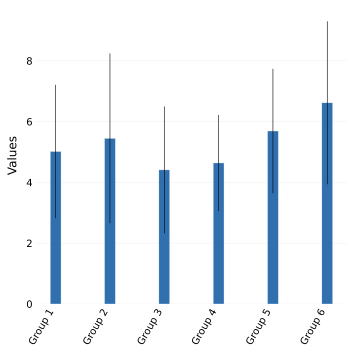

In [14]:
#| include: true
#| label: fig-comparisons
#| fig-cap: Comparison of average nurse working hours.
#| column: body-outset-right
##| fig-subcap:
##|   - Average working hours with 95% confidence intervals.
##|   - Results of group comparisons by independent t-tests.

N_GROUPS = 6
N_LEVELS = 1

data_ = np.random.normal(loc=5, scale=3.0, size=(N_GROUPS, N_LEVELS, 10))

# Calculate averages and confidence intervals
averages = np.mean(data_, axis=2)
conf_intervals = np.zeros_like(averages, dtype=float)

for group_idx in range(N_GROUPS):
    for level_idx in range(N_LEVELS):
        interval = stats.t.interval(
            0.95,
            len(data_[group_idx, level_idx]) - 1,
            loc=np.mean(data_[group_idx, level_idx]),
            scale=stats.sem(data_[group_idx, level_idx])
        )

        # Use upper bound
        conf_intervals[group_idx, level_idx] = np.abs(
            interval[1] - averages[group_idx, level_idx]
        )

# -- Plot grouped bars with confidence intervals -----------------------------

width = 0.2
colors = plt.cm.Blues_r(np.linspace(.15, .85, N_LEVELS))
line_thickness = 0.6
stagger_amount = 0.8

fig, ax = plt.subplots()

for level_idx in range(N_LEVELS):
    bars = ax.bar(
        np.arange(N_GROUPS) + level_idx * width - (width * (N_LEVELS - 1) / 2),
        averages[:, level_idx],
        yerr=conf_intervals[:, level_idx],
        width=width,
        edgecolor="white",
        alpha=0.85,
        # capsize=3,
        color=colors[level_idx],
        error_kw={'elinewidth': line_thickness, 'capsize': 0},
        label=f'Level {level_idx + 1}',
    )

# Style
ax.set_ylabel('Values')

group_labels = [f'Group {i}' for i in range(1, N_GROUPS + 1)]
ax.set_xticks(np.arange(N_GROUPS))
ax.set_xticklabels(group_labels, rotation=60, ha='right')

# ax.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')

# -- Add staggered sigbars and asterisks for select btwn-group comparisons ---

significance_level = 0.09
stagger_index = 0
stats_list = []

for comb in combinations(range(N_GROUPS), 2):
    group1_center = ax.get_xticks()[comb[0]]
    group2_center = ax.get_xticks()[comb[1]]

    t_stat, p_value = stats.ttest_ind(
        data_[comb[0], :, :].flatten(),
        data_[comb[1], :, :].flatten()
    )

    if p_value < significance_level:
        tallest_bar_height = np.max(averages) + np.max(conf_intervals) + 0.5

        # Adjust the stagger amount
        significance_height = (
            tallest_bar_height
            + np.max(conf_intervals) * 0.07
            + stagger_index * stagger_amount
        )

        # Plot staggered lines aligned with the midpoints of compared groups
        ax.plot(
            [group1_center, group2_center],
            [significance_height] * 2,
            color='black',
            lw=line_thickness
        )

        # Plot asterisks aligned with the center of the significance bars
        asterisks = (
            '*' * sum([p_value < alpha for alpha in [0.01, 0.001, 0.0001]])
        )
        ax.text(
            (group1_center + group2_center) / 2,
            significance_height,
            asterisks,
            ha='center',
            va='bottom',
            fontsize=10
        )

        # Increment the index for staggered bars
        stagger_index += 1

        # Store significant comparisons, t values, and sample sizes
        sample_size1 = len(data_[comb[0], :, :].flatten())
        sample_size2 = len(data_[comb[1], :, :].flatten())
        stats_list.append({
            "Comparison":
                f'{group_labels[comb[0]]} vs {group_labels[comb[1]]}',
            "p-value":
                f"{p_value:.4f}",
            "t-statistic":
                f"{t_stat:.4f}",
            "Sample Size": (
                f'{group_labels[comb[0]]} = {sample_size1}, '
                f'{group_labels[comb[1]]} = {sample_size2}'
            )
        })

# Style and show
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_visible(False)
ax.set_axisbelow(True)

ax.grid(axis='y')
plt.tight_layout()
plt.show()

stats_df = pd.DataFrame(stats_list)

In [15]:
#| echo: false
#| label: tbl-comparisons
#| tbl-cap: Results of group comparisons by independent t-tests.
#| layout-ncol: 1

GT(stats_df)

GT(_tbl_data=Empty DataFrame
Columns: []
Index: [], _body=<great_tables._gt_data.Body object at 0x16bcb4810>, _boxhead=Boxhead([]), _stub=<great_tables._gt_data.Stub object at 0x1698e12d0>, _spanners=Spanners([]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x1699ec8d0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='heading', type='value', value='center'), heading_title_font_size=OptionsInfo(scss=True, category='heading', type='px', value='125%'), heading_title_font_weight=OptionsInfo(scss=True, category='heading', type='value', value='initial'), heading_subtitle_font_size=OptionsInfo(scss=True, category='heading', type='px', value='85%'), heading_subtitle_font_weight=OptionsInfo(scss=True, category='heading', type='value', value='initial'), heading_padding=OptionsInfo(scss=True, category='heading', type='px', value='4px'), heading_padding_horizontal=OptionsInfo(scss=True, category='heading', type='px', value='5px'), heading_border_bottom_style=OptionsInfo(scss=True, category='heading', type='value', value='solid'

## Feature engineer

### Join geographical data

In [16]:
#| output: false
#| warning: false
#| code-fold: true
#| code-summary: Load the data

if 'uscities' not in locals():
    uscities = pd.read_csv(
        get_path_to("data", "raw", "uscities", "uscities.csv"),
        encoding='ISO-8859-1',
        low_memory=False
    )
else:
    print("data loaded.")
    
GT(uscities.sample(5))

GT(_tbl_data=               city    city_ascii state_id      state_name  county_fips  \
23055      Chloride      Chloride       AZ         Arizona         4015   
4237        Bohemia       Bohemia       NY        New York        36103   
1810         Conway        Conway       SC  South Carolina        45051   
15791    Springport    Springport       MI        Michigan        26075   
27861  Foundryville  Foundryville       PA    Pennsylvania        42037   

      county_name      lat       lng  population  density source  military  \
23055      Mohave  35.4097 -114.1972         287     73.5  shape     False   
4237      Suffolk  40.7717  -73.1271        9534    427.8  shape     False   
1810        Horry  33.8401  -79.0431       25121    395.8  shape     False   
15791     Jackson  42.3783  -84.6965         921    282.3  shape     False   
27861    Columbia  41.0775  -76.2355          96     68.6  shape     False   

       incorporated          timezone  ranking               zips          id  
23055         False   America/Phoenix        3              86431  1840023175  
4237          False  America/New_York        3              11716  1840005020  
1810           True  America/New_York        3  29527 29526 29528  1840014716  
15791          True   America/Detroit        3              49284  1840011199  
27861         False  America/New_York        3              18603  1840034974  , _body=<great_tables._gt_data.Body object at 0x178ec56d0>, _boxhead=Boxhead([ColInfo(var='city', type=<ColInfoTypeEnum.default: 1>, column_label='city', column_align='left', column_width=None), ColInfo(var='city_ascii', type=<ColInfoTypeEnum.default: 1>, column_label='city_ascii', column_align='left', column_width=None), ColInfo(var='state_id', type=<ColInfoTypeEnum.default: 1>, column_label='state_id', column_align='left', column_width=None), ColInfo(var='state_name', type=<ColInfoTypeEnum.default: 1>, column_label='state_name', column_align='left', column_width=None), ColInfo(var='county_fips', type=<ColInfoTypeEnum.default: 1>, column_label='county_fips', column_align='right', column_width=None), ColInfo(var='county_name', type=<ColInfoTypeEnum.default: 1>, column_label='county_name', column_align='left', column_width=None), ColInfo(var='lat', type=<ColInfoTypeEnum.default: 1>, column_label='lat', column_align='right', column_width=None), ColInfo(var='lng', type=<ColInfoTypeEnum.default: 1>, column_label='lng', column_align='right', column_width=None), ColInfo(var='population', type=<ColInfoTypeEnum.default: 1>, column_label='population', column_align='right', column_width=None), ColInfo(var='density', type=<ColInfoTypeEnum.default: 1>, column_label='density', column_align='right', column_width=None), ColInfo(var='source', type=<ColInfoTypeEnum.default: 1>, column_label='source', column_align='left', column_width=None), ColInfo(var='military', type=<ColInfoTypeEnum.default: 1>, column_label='military', column_align='center', column_width=None), ColInfo(var='incorporated', type=<ColInfoTypeEnum.default: 1>, column_label='incorporated', column_align='center', column_width=None), ColInfo(var='timezone', type=<ColInfoTypeEnum.default: 1>, column_label='timezone', column_align='left', column_width=None), ColInfo(var='ranking', type=<ColInfoTypeEnum.default: 1>, column_label='ranking', column_align='right', column_width=None), ColInfo(var='zips', type=<ColInfoTypeEnum.default: 1>, column_label='zips', column_align='right', column_width=None), ColInfo(var='id', type=<ColInfoTypeEnum.default: 1>, column_label='id', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x1699b8a90>, _spanners=Spanners([]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x17d31a790>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), ta

In [17]:
#| code-fold: true
#| code-summary: Prepare the dataset to be joined

data_ = data.copy()
data_["CITY"] = data_['CITY'].str.title()
data_.rename(columns={"CITY": "city"}, inplace=True)

In [18]:
#| code-fold: false
#| code-summary: Join the datasets

# Join
data_geo = data_.join(uscities.set_index("city")[["lat", "lng"]], on="city")
GT(data_geo.head())

GT(_tbl_data=  PROVNUM                  PROVNAME          city STATE COUNTY_NAME  \
0  015009  BURNS NURSING HOME, INC.  Russellville    AL    Franklin   
0  015009  BURNS NURSING HOME, INC.  Russellville    AL    Franklin   
0  015009  BURNS NURSING HOME, INC.  Russellville    AL    Franklin   
0  015009  BURNS NURSING HOME, INC.  Russellville    AL    Franklin   
0  015009  BURNS NURSING HOME, INC.  Russellville    AL    Franklin   

   COUNTY_FIPS  CY_Qtr  WorkDate  MDScensus  Hrs_RNDON  ...  Hrs_CNA_emp  \
0           59  2024Q1  20240101         50        8.0  ...       156.34   
0           59  2024Q1  20240101         50        8.0  ...       156.34   
0           59  2024Q1  20240101         50        8.0  ...       156.34   
0           59  2024Q1  20240101         50        8.0  ...       156.34   
0           59  2024Q1  20240101         50        8.0  ...       156.34   

   Hrs_CNA_ctr  Hrs_NAtrn  Hrs_NAtrn_emp  Hrs_NAtrn_ctr  Hrs_MedAide  \
0          0.0        0.0            0.0            0.0          0.0   
0          0.0        0.0            0.0            0.0          0.0   
0          0.0        0.0            0.0            0.0          0.0   
0          0.0        0.0            0.0            0.0          0.0   
0          0.0        0.0            0.0            0.0          0.0   

   Hrs_MedAide_emp  Hrs_MedAide_ctr      lat      lng  
0              0.0              0.0  35.2762 -93.1383  
0              0.0              0.0  34.5055 -87.7283  
0              0.0              0.0  36.8394 -86.8950  
0              0.0              0.0  38.5127 -92.4385  
0              0.0              0.0  36.2580 -83.1966  

[5 rows x 35 columns], _body=<great_tables._gt_data.Body object at 0x16bd64810>, _boxhead=Boxhead([ColInfo(var='PROVNUM', type=<ColInfoTypeEnum.default: 1>, column_label='PROVNUM', column_align='right', column_width=None), ColInfo(var='PROVNAME', type=<ColInfoTypeEnum.default: 1>, column_label='PROVNAME', column_align='left', column_width=None), ColInfo(var='city', type=<ColInfoTypeEnum.default: 1>, column_label='city', column_align='left', column_width=None), ColInfo(var='STATE', type=<ColInfoTypeEnum.default: 1>, column_label='STATE', column_align='left', column_width=None), ColInfo(var='COUNTY_NAME', type=<ColInfoTypeEnum.default: 1>, column_label='COUNTY_NAME', column_align='left', column_width=None), ColInfo(var='COUNTY_FIPS', type=<ColInfoTypeEnum.default: 1>, column_label='COUNTY_FIPS', column_align='right', column_width=None), ColInfo(var='CY_Qtr', type=<ColInfoTypeEnum.default: 1>, column_label='CY_Qtr', column_align='left', column_width=None), ColInfo(var='WorkDate', type=<ColInfoTypeEnum.default: 1>, column_label='WorkDate', column_align='right', column_width=None), ColInfo(var='MDScensus', type=<ColInfoTypeEnum.default: 1>, column_label='MDScensus', column_align='right', column_width=None), ColInfo(var='Hrs_RNDON', type=<ColInfoTypeEnum.default: 1>, column_label='Hrs_RNDON', column_align='right', column_width=None), ColInfo(var='Hrs_RNDON_emp', type=<ColInfoTypeEnum.default: 1>, column_label='Hrs_RNDON_emp', column_align='right', column_width=None), ColInfo(var='Hrs_RNDON_ctr', type=<ColInfoTypeEnum.default: 1>, column_label='Hrs_RNDON_ctr', column_align='right', column_width=None), ColInfo(var='Hrs_RNadmin', type=<ColInfoTypeEnum.default: 1>, column_label='Hrs_RNadmin', column_align='right', column_width=None), ColInfo(var='Hrs_RNadmin_emp', type=<ColInfoTypeEnum.default: 1>, column_label='Hrs_RNadmin_emp', column_align='right', column_width=None), ColInfo(var='Hrs_RNadmin_ctr', type=<ColInfoTypeEnum.default: 1>, column_label='Hrs_RNadmin_ctr', column_align='right', column_width=None), ColInfo(var='Hrs_RN', type=<ColInfoTypeEnum.default: 1>, column_label='Hrs_RN', column_align='right', column_width=None), ColInfo(var='Hrs_RN_emp', type=<ColInfoTypeEnum.default: 1>, column_label='Hrs_RN_emp', column_align='right', column_width=None), ColInfo(var='Hrs_RN_ctr', type=<ColInfoTypeEnum

In [19]:
#| include: true
#| code-summary: Group by city

# Sum aggregate hours columns
data_geo["total hours"] = (
    data_geo
    .filter(regex=r'^Hrs_[^_]+$', axis='columns')
    .sum(axis=1)
)

# Group hours by city (collapse across date)
data_geo_ = (
    data_geo
    .dropna()
    .groupby(by=["city"], as_index=False)
    .agg({"total hours": "sum", "lat": "first", "lng": "first"})
    .rename(columns={"total hours": "total_hours_sum"})
)

data_geo_

city  total_hours_sum      lat      lng
0       Abbeville        719218.25  29.9751 -92.1265
1      Abbotsford         18874.74  44.9435 -90.3174
2        Aberdeen       1438830.64  45.4649 -98.4686
3         Abilene        501995.08  32.4543 -99.7384
4        Abingdon        189129.03  36.7090 -81.9713
...           ...              ...      ...      ...
4641  Zephyrhills        109127.03  28.2409 -82.1797
4642         Zion        277935.12  42.4603 -87.8511
4643   Zionsville         21331.67  39.9897 -86.3182
4644     Zumbrota         11981.41  44.2950 -92.6736
4645       Zwolle         11500.80  31.6398 -93.6412

[4646 rows x 4 columns]

In [34]:
#| include: true
#| column: screen
#| label: fig-geo
#| fig-cap: Hours worked by US city, represented by point size and colour.

import geopandas as gpd

gdf = gpd.GeoDataFrame(
    data_geo_,
    geometry=gpd.points_from_xy(data_geo_["lng"], data_geo_["lat"])
)

# Load a world map for plotting
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# us = world[world['name'] == "United States"]

# Plot the map in the background
fig, ax = plt.subplots(figsize=(8, 6))
world.plot(ax=ax, color="white")

# ?Normalize the hours for color mapping
norm = plt.Normalize(
    vmin=gdf["total_hours_sum"].min(),
    vmax=gdf["total_hours_sum"].max()
)
cmap = plt.cm.Jet

# Plot the cities on top of the US map, color and size by total_hours_sum
gdf.plot(
    ax=ax,
    # ?
    color=gdf["total_hours_sum"].apply(lambda x: cmap(norm(x))),
    markersize=gdf["total_hours_sum"] / 500000,
    alpha=0.6
)

# Add labels to cities with total_hours_sum > 10,000
for x, y, label, hours in zip(
    gdf.geometry.x, gdf.geometry.y, gdf["city"], gdf["total_hours_sum"]
):
    if hours > 20000000:
        ax.text(x, y, label, fontsize=8, ha="right")

# Add a color bar to show the scale of total_hours_sum
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for colorbar
cbar = plt.colorbar(sm, ax=ax, shrink=0.5)
# cbar.set_label("Total Hours")

ax.set_axis_off()

# plt.title("US Cities with Total Nurse Hours")
plt.xlim([-130, -65])  # Focus on the US longitude range
plt.ylim([20, 50])     # Focus on the US latitude range
plt.show()

### Join seasonal data

## Analyze geography

## Analyze seasonality

## Model

## Extra visualizations

### Sparklines

In [21]:
#| include: false
#| code-summary: Group by state, pivot on date and sum hours

df = data.copy()

hours_columns = [
    'Hrs_RNDON', 'Hrs_RNadmin', 'Hrs_LPNadmin',
    'Hrs_CNA', 'Hrs_NAtrn', 'Hrs_MedAide'
]

# Sum hours across positions
df['Total_Hours'] = df[hours_columns].sum(axis=1)

# Create a list of total hours per state over the work dates
city_hours = (
    df.groupby(['STATE', 'WorkDate'])['Total_Hours']
    .sum()
    .reset_index()
)

# Pivot to create lists of total hours for each state
pivoted_city_hours = city_hours.pivot_table(
    index=['STATE'],
    columns='WorkDate',
    values='Total_Hours',
    aggfunc='sum',
    fill_value=0
)

# Create a new column with lists of total hours over the 91 days
pivoted_city_hours['lines'] = pivoted_city_hours.apply(
    lambda row: {'val': row.tolist()}, axis=1
)

# Prepare the DataFrame for gt
gt_df = pivoted_city_hours.reset_index()[['STATE', 'lines']]

# Create a line plot for total hours trajectory by state
# gt_df['bars'] = gt_df['lines']

gt_df.head()


WorkDate STATE                                              lines
0           AK  {'val': [2207.94, 2712.93, 2761.5499999999997,...
1           AL  {'val': [48104.89, 58689.2, 61364.25, 61429.5,...
2           AR  {'val': [42257.44, 51400.62, 53068.8, 53019.07...
3           AZ  {'val': [25315.55, 29657.54, 30869.61, 31035.9...
4           CA  {'val': [240612.74, 272889.84, 278436.09, 2814...

In [22]:
#| label: fig-sparklines
#| fig-cap: Sparklines of average work hours across 91 days by state.
#| code-fold: true

# Plot sparklines of average work hours across 91 days by state
(
    GT(gt_df.head(), rowname_col="STATE")
    .fmt_nanoplot(
        columns="lines",
        reference_line="mean",
        reference_area=["min", "q1"]
    )
    .tab_header(
        title="Nurse hours worked in the United States",
        subtitle="The top 5 busiest states",
    )
    .tab_stubhead(label="State")
    .cols_label(
        lines="Total hours worked over 91 days",
    )
)

GT(_tbl_data=WorkDate STATE                                              lines
0           AK  {'val': [2207.94, 2712.93, 2761.5499999999997,...
1           AL  {'val': [48104.89, 58689.2, 61364.25, 61429.5,...
2           AR  {'val': [42257.44, 51400.62, 53068.8, 53019.07...
3           AZ  {'val': [25315.55, 29657.54, 30869.61, 31035.9...
4           CA  {'val': [240612.74, 272889.84, 278436.09, 2814..., _body=<great_tables._gt_data.Body object at 0x16bd91710>, _boxhead=Boxhead([ColInfo(var='STATE', type=<ColInfoTypeEnum.stub: 2>, column_label='STATE', column_align='left', column_width=None), ColInfo(var='lines', type=<ColInfoTypeEnum.default: 1>, column_label='Total hours worked over 91 days', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x2982cd690>, _spanners=Spanners([]), _heading=Heading(title='Nurse hours worked in the United States', subtitle='The top 5 busiest states', preheader=None), _stubhead='State', _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x2983666d0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x2982eeed0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsI

## Concluding thoughts

(see @nte-rec1)

<!-- ## Archive -->

In [23]:
#| include: false
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

df = pd.DataFrame({'name': ['arizona', '', 'berlin', 'london']})

geolocator = Nominatim(user_agent="geo_clipboard")

geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df['location'] = df['name'].apply(geocode)

df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [24]:
#| include: false
df

name                                           location  \
0  arizona  (Arizona, United States, (34.395342, -111.7632...   
1                                                        None   
2   berlin     (Berlin, Deutschland, (52.510885, 13.3989367))   
3   london  (London, Greater London, England, United Kingd...   

                           point  
0  (34.395342, -111.763275, 0.0)  
1                           None  
2   (52.510885, 13.3989367, 0.0)  
3  (51.5074456, -0.1277653, 0.0)